In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('Cyber_salaries_modified.csv')

In [2]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,MI,FT,Cyber Security Engineer,10000,DZ,50,DZ,M
1,2021,EN,FT,Security Consultant,10142,IN,50,IN,L
2,2021,EN,FT,Cyber Security Engineer,10200,DZ,0,DZ,L
3,2021,EN,FT,Network Security Engineer,11305,IN,50,IN,L
4,2021,EN,PT,Penetration Testing Engineer,11812,TW,50,TW,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           1330 non-null   int64 
 1   experience_level    1330 non-null   object
 2   employment_type     1330 non-null   object
 3   job_title           1330 non-null   object
 4   salary_in_usd       1330 non-null   int64 
 5   employee_residence  1330 non-null   object
 6   remote_ratio        1330 non-null   int64 
 7   company_location    1330 non-null   object
 8   company_size        1330 non-null   object
dtypes: int64(3), object(6)
memory usage: 93.6+ KB


In [4]:
df.describe()

,work_year,salary_in_usd,remote_ratio
count,1330.000000,1330.000000,1330.000000
mean,2021.375940,123237.766917,72.669173
std,0.706857,68041.057074,39.121509
min,2020.000000,10000.000000,0.000000
25%,2021.000000,76275.000000,50.000000
50%,2022.000000,115900.000000,100.000000
75%,2022.000000,153000.000000,100.000000
max,2022.000000,899920.000000,100.000000


In [5]:
df.isnull()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1325,False,False,False,False,False,False,False,False,False
1326,False,False,False,False,False,False,False,False,False
1327,False,False,False,False,False,False,False,False,False
1328,False,False,False,False,False,False,False,False,False


In [6]:
df.sum()

work_year                                                       2688430
experience_level      MIENENENENMIMIMIMIENENEXENMISEENSEMIMIMISEMIEN...
employment_type       FTFTFTFTPTFTFTFTFTFTFTFTFTFTFTFTFTFTFTFTFTFTPT...
job_title             Cyber Security EngineerSecurity ConsultantCybe...
salary_in_usd                                                 163906230
employee_residence    DZINDZINTWBAEGINININBRGBINININGRPKINCRININZADE...
remote_ratio                                                      96650
company_location      DZINDZINTWBAEGINININBRGBINININGRPKUSUSINBRZADE...
company_size          MLLLSSMLMMLMLLSMLLLMLLMLLLLMMMLLSMMLMLLLLLMLLL...
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fde56d17890>,
      dtype=object)

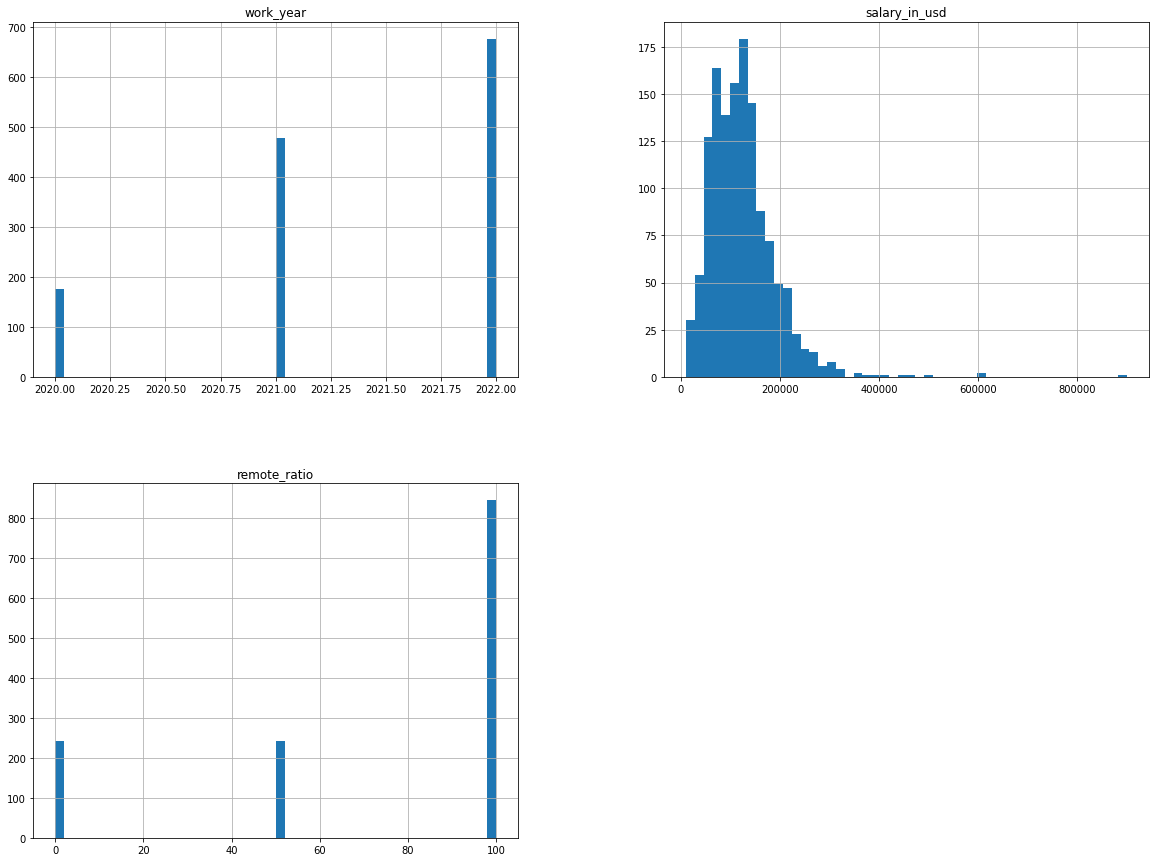

In [ ]:
df.hist(bins=50, figsize=[20,15])

In [ ]:
df.corr()["salary_in_usd"].sort_values(ascending=False)

salary_in_usd    1.000000
work_year        0.179579
remote_ratio     0.172278
Name: salary_in_usd, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fde494a0590>,
      dtype=object)

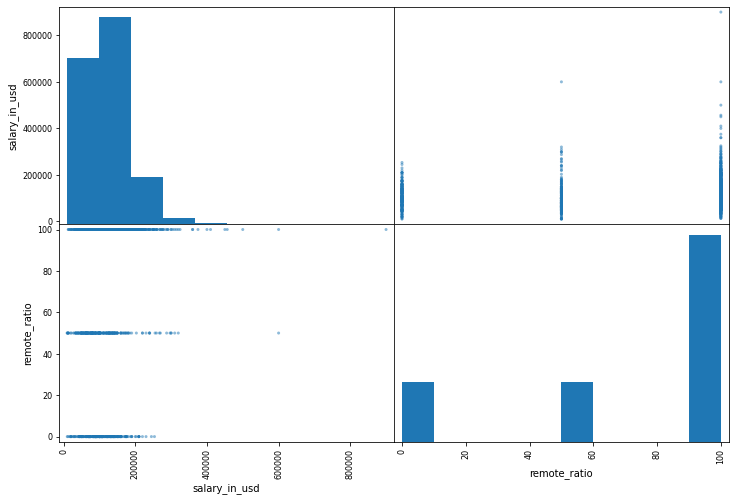

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["salary_in_usd","employment_type","experience_level","remote_ratio","company_location"]
scatter_matrix(df[attributes], figsize=(12,8))

In [ ]:
def ordinal_encoder(cat):
  dict = {'PT':0, 'FT':1}
  return dict[cat]

print('PT', ordinal_encoder('PT'))
print('FT', ordinal_encoder('FT'))

df['employment_type'] = df['employment_type'].apply(ordinal_encoder)

PT 0
FT 1


KeyError: ignored

In [ ]:
def oneHot(cat, hot):
  if cat == hot:
    return 1
  else:
    return 0

In [ ]:
df['GRADUATE SCHOOL'] = df['EDUCATION'].apply(oneHot, hot=3)
df['UNIVERSITY'] = df['EDUCATION'].apply(oneHot, hot=2)
df['HIGH SCHOOL'] = df['EDUCATION'].apply(oneHot, hot=1)
df['OTHER'] = df['EDUCATION'].apply(oneHot, hot=0)

In [ ]:
print(pd.get_dummies(df['EDUCATION']))

       GRADUATE SCHOOL  HIGH SCHOOL  OTHER  UNIVERSITY
0                    0            0      0           1
1                    0            0      0           1
2                    0            0      0           1
3                    0            0      0           1
4                    0            0      0           1
...                ...          ...    ...         ...
29650                0            1      0           0
29651                0            1      0           0
29652                0            0      0           1
29653                0            1      0           0
29654                0            0      0           1

[29655 rows x 4 columns]


In [ ]:
df = df.drop(['EDUCATION'],axis=1)

In [ ]:
X = df.drop(['default payment next month'],axis=1)
y = df[['default payment next month']]


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


pipeline = Pipeline([
    ('std_scaler', StandardScaler())
    
])

df_scaled = pipeline.fit_transform(X)
X = pd.DataFrame(df_scaled)
#df.head()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
sgd_clf = KNeighborsClassifier(n_neighbors=11)
sgd_clf.fit(X_train, y_train)

y_pred = sgd_clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
accuracy_score(y_test, y_pred)

0.8038213957290283

In [ ]:
precision_score(y_test, y_pred)

0.6149377593360996

In [ ]:
recall_score(y_test, y_pred)

0.33727810650887574

In [ ]:
f1_score(y_test, y_pred)

0.435626102292769